# Data Preparation: Zyklische Daten transformieren
Manche Daten sind zyklischer Natur, z. B. Datums- und Uhrzeiten, Jahreszeiten u.s.w.

Bei Daten diesen Typs ergibt sich ein Problem, wenn man sie für Machine Learning verwenden möchte. Angenommen uns liegen die Uhrzeiten in "Sekunden nach Mitternacht" vor. Dann wäre eine Messwert (z.B. eine Temperaturmessung) eine Sekunde *vor* Mitternacht mit einem Wert für die Uhrzeit von $24*60*60 - 1 = 86399$ zugeordnet. Ein Messwert eine Sekunde *nach* Mitternacht jedoch mit dem Wert 1. Die Differenz bezüglich der Uhrzeiten beträgt somit $86399 - 1 = 86398$, obwohl doch nur 2 Sekunden vergangen sind!

| Uhrzeit/Sekunden | Temperatur Celsius |
|:---:|:---:|
| 86398 | 16,3 |
| 86399 | 16,4 |
| 86400 | 16,4 |
| 1 | 16,5 |
| 2 | 16,5 |
| 3 | 16,5 |

Unser ML-Modell "weiß" also nichts von der zyklischen Natur der Daten. Wir müssen solche Daten also geschickt umwandeln.

Erstellen wir hierfür einen Demo-Datensatz:

In [1]:
import numpy as np
# Erstelle für 5 Tage 50 "Sekunden-nach Mitternacht-Werte" für jeden Tag
secs = np.tile(np.arange(0,24*60*60, 50), 5)

Wir plotten die Daten:

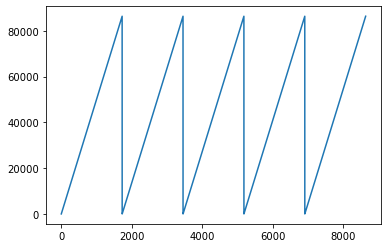

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(secs)
plt.show()

Es ergibt sich ein typisches "Sägezahnmuster", das wie geschildert nicht gewünscht ist: Um "Mitternacht" ergibt sich eine riesige Differenz zwischen den Sekundenwerten, obwohl noch nur Sekunden dazwischen liegen!

## Die Lösung: Sinus- und Cosinuswerte

Die Lösung des Problems ist so einfach wie genial: Wir kodieren die Sekundenwerte in Sinus- und Cosinuswerte! Wichtig: Wir brauchen tatsächlich beide Werte, kodieren also die Sekunden (eine Dimension) in einen 2-dimensionalen Wert!

Wandeln wir die Sekunden zuerst in Sinus- und Cosinuswerte um:

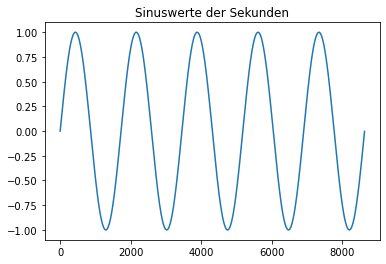

In [8]:
%matplotlib inline
sekunden_pro_tag = 24*60*60

sin_sekunden = np.sin(2*np.pi*secs/sekunden_pro_tag)
cos_sekunden = np.cos(2*np.pi*secs/sekunden_pro_tag)

plt.plot(sin_sekunden)
plt.title("Sinuswerte der Sekunden")
plt.show()

Was wir schon mal im Plot für die Sinuswerte erkennen: Um Mitternacht ändern sich die Sinus-Werte nur unwesentlich! Allerdings haben das Problem noch nicht ganz gelöst: Wir erhalten für unterschiedliche Uhrzeiten gleiche Sinus-Werte. Zum Beispiel erhalten wir für 12 Uhr Mittags und für Mitternacht die gleichen Sinuswerte von 0 (Floating-Point-Fehler mal ausgenommen, daher runden wir):

In [12]:
print(np.round(np.sin(2*np.pi*24*60*60/sekunden_pro_tag),2))
print(np.round(np.sin(2*np.pi*12*60*60/sekunden_pro_tag),2))

0.0
-0.0


Nun kommt der Cosinus ins Spiel: Als weitere Dimension der Uhrzeit berücksichtigen wir zusätzlich den Cosinus - und dieser ist z.B. bei Mitternacht und 12 Uhr Mittags unterschiedlich:

In [5]:
print(np.cos(2*np.pi*24*60*60/sekunden_pro_tag))
print(np.cos(2*np.pi*12*60*60/sekunden_pro_tag))

1.0
-1.0


Wir müssten für ei ML-Modell also 2 Features für die Uhrzeit erzeugen: Die Sinus- und die Cosinuswerte der Uhrzeiten!

Eindrücklich demonstrieren kann man dieses Vorgehen, wenn wir beide Werte kombiniert in einem Scatterplot ausgeben! Wir erhalten dann sozusagen eine "Uhr":

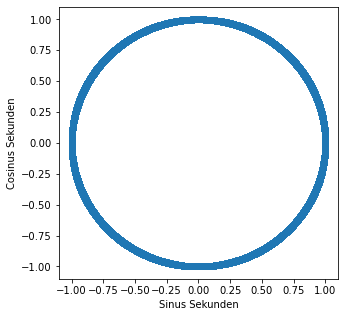

In [6]:
%matplotlib inline

plt.rcParams["figure.figsize"] = (5,5)

plt.scatter(sin_sekunden,cos_sekunden)
plt.xlabel("Sinus Sekunden")
plt.ylabel("Cosinus Sekunden")
plt.show()